# Lab 8: K-means Clustering

In this Lab, you will implement the K-means clustering algorithm and apply it to compress an image.

You will first start on an example 2D dataset that will help you gain an intuition of how the K-means algorithm works. After that, you wil use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

## 1. Implementing K-means
The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set $\{ x^{(1)}, \dots, x^{(n)} \}$ (where $x^{(i)} \in \mathbb{R}^d$), and want to group the data into a few cohesive "*clusters*". The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

The K-means algorithm is as follows:
```python
# Initialize centroids
centroids = kMeansInitCentroids(X, K)
for itr in range(0, iterations):
    # "Cluster assignment" step: Assign each data point to the closest centroid. 
    # idx[i] corresponds to the index of the centroid assigned to data-point i
    idx = findClosestCentroids(X, centroids)
    
    # "Move centroid" step: Compute means based on centroid assignments
    centroids = computeCentroids(X, idx, K)
```

The inner-loop of the algorithm repeatedly carries out two steps: (i) Assigning each training example $x^{(i)}$ to its closest centroid, and (ii) Recomputing the mean of each centroid using the points assigned to it. The K-means algorithm will always converge to some final set of means for the centroids. Note that the converged solution may not always be ideal and depends on the initial setting of the centroids. Therefore, in practice the K-means algorithm is usually run a few times with different random initializations.

You will implement the two phases of the K-means algorithm separately in the next sections.

### 1.1. Finding closest centroids
In the "cluster assignment" phase of the K-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. Specifically, for every example $i$ we set
$$c^{(i)} = j \text{ that minimizes } \left \| x^{(i)} - \mu_j \right \|^2$$
where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$, and $\mu_j \in \mathbb{R}^d$ is the position (vector of values) of the $j^{th}$ centroid. Note that $c^{(i)}$ corresponds to `idx[i]` in the algorithm shown above.

Your task is to complete the function `findClosestCentroids(X, centroids)` in the following Python code. This function takes the data matrix $X$ and the centroids inside `centroids` and should output a one-dimensional array `idx` that holds the index (a value in $\{1, \dots, K\}$ where $K$ is total number of centroids) of the closest centroid to every training example. The length of the array `idx` should be the same as the number of data-points (i.e. `len(idx) == len(X) == n`). You can implement this using a loop over every training example and
every centroid.

Once you have completed the function `findClosestCentroids(..)`, you can test it using the examples `X` and `centroids` provided in the code below. If you implemented the function correctly, you should get the array `[1  2  0  0]` (i.e. we have $K=3$ centroinds; the data-point `X[0]` is assigned to cluster centroid `1`, the data-point `X[1]` is assigned to cluster centroid `2`, the data-point `X[2]` is assigned to cluster centroid `0`, and the data-point `X[3]` is assigned to cluster centroid `0`).

In [2]:
import numpy as np


""" TODO:
Complete the definition of the function findClosestCentroids(X, centroids). This 
function takes the data matrix X and the centroids, and should output an array 
idx that holds the index of the closest centroid to every training data-point.
"""
def findClosestCentroids(X, centroids):
    # The idx list will contain the index of the closest centroid to each data-point
    idx = []
    
    # For each data-point xi from our dataset X
    for xi in X:
        # TODO: compute the Euclidean distance from x to all centoids. The results should be in a list distances
        distances = [np.linalg.norm(xi - c) for c in centroids]

        
        # TODO: find the index j corresponding to the smallest distance in distances (you can use np.argmin(..))
        j = np.argmin(distances)
        
        # TODO: append the index of the closest centroid from xi, to the list idx
        idx.append(j)
    
    # Return the list idx as an array
    return np.array(idx)


""" TODO:
Test your function findClosestCentroids(..) by calling it using 
the examples X and centroids given below. If you implemented the 
function correctly, you should get [1, 2, 0, 0]
"""
X = np.array([[1, 2], [3, 4], [5, 6], [9, 11]]) # Example dataset with 4 data-points
centroids = np.array([[7, 5], [0, 2], [3, 3]])  # Initial centroids (we have K=3 centroids)
idx = findClosestCentroids(X, centroids)
print(idx)

[1 2 0 0]


### 1.2. Computing centroid means
Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specifically, for every centroid $j$ we set it to:
$$\mu_j = \frac{1}{|C_j|} \sum_{i \in C_j} x^{(i)}$$
where $C_j$ is the set of examples that are assigned to centroid $j$ (i.e. the $j^{th}$ cluster). Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $j = 2$, then you should update this centroid as $\mu_2 = \frac{1}{2} (x^{(3)} + x^{(5)})$.

You should now complete the function `computeCentroids(X, idx, K)` in the following code. You can implement this function using a loop over the centroids. You can also use a loop over the examples; but if you can use a vectorized implementation that does not use such a loop, your code may run faster.

Once you have completed the function `computeCentroids(X, idx, K)`, you can test it by calling it once with `K = 3` centroids on the previous example dataset `X` with `idx = np.array([1, 2, 0, 0])`. If your implementation is correct, the function should return the following 3 centroids as a result:
```python
[[ 7.   8.5]
 [ 1.   2. ]
 [ 3.   4. ]]
```


In [13]:
""" TODO:
Complete the definition of the function computeCentroids(X, idx, K). This function 
takes as arguments the dataset X, the array of assignments idx (that indicates for 
each data-point, the index of its nearest centroid), and the number of centroids K. 
It should return a new array of centroids.
"""
def computeCentroids(X, idx, K):
    new_centroids = [] # This will contain the new re-computed centroids
    
    # For each centroid (or cluster) index j
    for j in range(K):
        pass
        # TODO: find Cj, the array of all data-points that were assigned to centroid j
        Cj = X[np.where(idx == j)]
        # TODO: re-compute the new centroid j as the mean (center) of the data-points in Cj
        mu_j = 1 / len(Cj) * np.sum(Cj, axis=0)
        
        # TODO: append your re-computed centroid mu_j to the list new_centroids
        new_centroids.append(mu_j)
    
    # Return new_centroids as an array
    return np.array(new_centroids)


""" TODO:
Test your function computeCentroids(X, idx, K) by calling it with K = 3 on
the previous example dataset X with idx = np.array([1, 2, 0, 0])
"""
idx = np.array([1, 2, 0, 0])
centroids = computeCentroids(X, idx, K = 3)
print(centroids)


[[7.  8.5]
 [1.  2. ]
 [3.  4. ]]


## 2. K-means on an example dataset
After you have completed the two functions (`findClosestCentroids(..)` and `computeCentroids(..)`) successfully, the next step is to use them in the main K-means algorithm on a toy 2-dimensional dataset to help you understand how K-means works. Run the following code to load the dataset and plot it.

X.shape: (300, 2)


/var/folders/nn/fsqh4pp547v34jxkkmj_6s7m0000gn/T/ipykernel_24792/1144051133.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


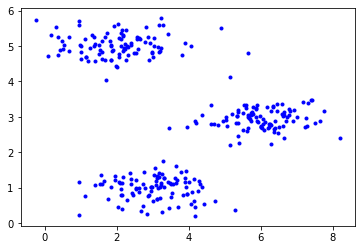

In [14]:
%matplotlib inline
import matplotlib.pylab as plt
from scipy.io import loadmat

mat = loadmat("datasets/lab7data1.mat")
X = mat["X"]
np.random.shuffle(X)
print("X.shape:", X.shape)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], marker=".", color="blue")
fig.show()

In the following Python code a function `Kmeans(X, K, max_iterations)` is defined. This function performs K-means clustering by calling the two functions that you implemented (`findClosestCentroids(..)` and `computeCentroids(..)`) inside a loop. It returns the final cluster centroids.

Read the `Kmeans(X, K, max_iterations)` function to understand it, then call it with `K = 3` and `max_iterations = 50`, on the dataset `X` that we loaded previously. Once K-means finishes running and returns the final centroids, your task is to produce a plot of the dataset with colors corresponding to the clusters that K-means found. Your plot should be similar to the following figure.
<img src="imgs/clustResultLab7A.png" width="500px" />
**Hint:** After calling `Kmeans(..)` and getting the final centroids, you can get the cluster index to which each data-point belongs, by calling `idx = findClosestCentroids(X, centroids)` once again. Then, in order, for example, to select the data-points that are members of cluster 0, you can use `X[idx == 0]`.


No handles with labels found to put in legend.


(100, 2)


/var/folders/nn/fsqh4pp547v34jxkkmj_6s7m0000gn/T/ipykernel_24792/1107676638.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


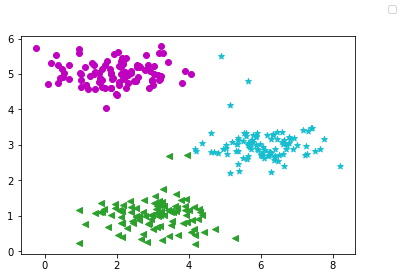

In [54]:
import numpy as np

# This function performs K-means clustering and returns the final cluster centroids
def Kmeans(X, K, max_iterations):
    # Initialize centroids: we pick randomly K different points as our initial centroids
    random_ids = np.random.choice(len(X), K, replace=False) # pick K random ids from range(len(X))
    centroids = X[random_ids]

    for itr in range(1, max_iterations):
        idx = findClosestCentroids(X, centroids) # Assigning data-points to clusters
        centroids = computeCentroids(X, idx, K)  # Updating (re-computing) the centroids
        
    return centroids


""" TODO:
Call the Kmeans(X, K, max_iterations) function with K=3 and produce a plot similar 
to the above figure. Data-points within the same cluster should have the same color.
"""
K = 3                # Number of clusters (and centroids) that we want to get
max_iterations = 50  # Number of iterations to perform
centroids = Kmeans(X, K, max_iterations)
# TODO: continue here to produce the required plot
idx = findClosestCentroids(X, centroids)
C0 = X[idx==0]
C1 = X[idx==1]
C2 = X[idx==2]
fig, ax = plt.subplots()
ax.scatter(C0[:,0], C0[:,1], color="tab:cyan",marker="*")
ax.scatter(C1[:,0], C1[:,1], color="tab:green", marker="<")
ax.scatter(C2[:,0], C2[:,1], color="m",  marker="o")
fig.legend()
fig.show()


## 3. Image compression with K-means
<img src="datasets/bird_small.png" />

In this section, you will apply K-means to image compression. In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding. Our image contains thousands of colors, and in this part of the Lab, you will reduce the number of colors to 16 colors.

By making this reduction, it is possible to represent (compress) the photo in an effcient way. Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this section, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3-dimensional RGB space. Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

### 3.1. K-means on pixels
In Python, images can be read as follows `A = plt.imread('image.png')`. For RGB images, this function creates a three-dimensional matrix $A$ of shape `(p, q, 3)` where $p \times q$ is the number of pixels in the image, and each element `A[i][j]` (corresponding to the pixel at row $i$ and column $j$) is a 3-dimensional vector containing the RGB (*red*, *green*, *blue*) intensities.

We consider each pixel as a 3-dimensional data-point. Therefore, the number of data-points we have is the number of pixels in the image (i.e. $n = p \times q$). For example, for an RGB image of $128 \times 128 = 16384 = n$ pixels, our dataset is $X \in \mathbb{R}^{16384 \times 3}$.

The following Python code first loads the image, and then reshapes it to create an $n \times 3$ matrix of pixels (where $n = 16384 = 128 \times 128$), and calls the `Kmeans(..)` function on it to cluster the pixel colors into 16 clusters. This clustering process may take some time (few seconds or minutes) as we have 16384 data-points (pixels). After finding the top K = 16 colors to represent the image, we can now assign each pixel to its closest centroid using the `findClosestCentroids(..)` function. This allows us to represent the original image using the centroid assignments of each pixel and plot the new image. The image that you will get is shown in the following figure.

<img src="imgs/KmeansCompressedBird.png" width="350px" />

Notice that you have significantly reduced the number of bits that are required to describe the image. The original image required 24 bits for each one of the $128 \times 128$ pixel locations, while the new representation requires only requires 4 bits per pixel location. The final number of bits used would correspond to compressing the original image by about a factor of 6 (i.e. we eliminated $\sim 83\%$ of the original size).

**Your Task:** Once you read the code and run it and see the results, you can then try to run it with a smaller value of $K$ (e.g. $k = 10, K = 5, K = 2$) and see the results again.

A.shape: (128, 128, 3)
X.shape: (16384, 3)
Performing Kmeans ... This may take some time ...


/var/folders/nn/fsqh4pp547v34jxkkmj_6s7m0000gn/T/ipykernel_24792/40870677.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


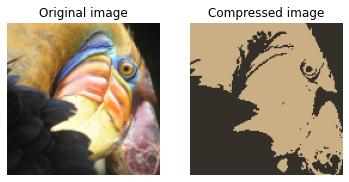

In [58]:
import matplotlib.pylab as plt

# Loading the image bird_small.png into a p*q*d matrix A (here p=q=128, and d=3)
A = plt.imread('datasets/bird_small.png')
print("A.shape:", A.shape)

# Reshape A into an n*d matrix X (our dataset of n pixels/data-points)
X = A.reshape(A.shape[0] * A.shape[1], A.shape[2])
print("X.shape:", X.shape)

# Apply K-means to X to cluster the pixels into 16 clusters based on their RGB intensities.
print("Performing Kmeans ... This may take some time ...")
centroids = Kmeans(X, K=2, max_iterations=20)

# For each pixel (X[i]) in X, we find its closest centroid (idx[i])
idx = findClosestCentroids(X, centroids)

# Create a new matrix XX where each data-point is replaced by its closest centroid
XX = np.array([ centroids[i] for i in idx ])

# Reshape XX back into an image (matrix AA of dimension p*q*d)
AA = XX.reshape(128, 128, 3)

# Plot the original image A and the new image AA
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A)
ax1.axis("off")
ax1.set_title("Original image")

ax2.imshow(AA)
ax2.axis("off")
ax2.set_title("Compressed image")

fig.show()

## 4. Optional: Use your own image
This section is optional. In this section, you can reuse the code we have supplied above to run on one of your own images. Note that if your image is very large, then K-means can take a long time to run. Therefore, we recommend that you resize your images to managable sizes (e.g. $128 \times 128$ pixels) before running the code. You can also try to vary K to see the effects on the compression.

In [ ]:
# ...
# ...
# ...
# ...
